In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [25]:
df = pd.read_csv('data/IBM.csv', index_col=0, parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363289,4261700
2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085762,4566100
2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309669,3212900
2022-10-06,124.879997,125.300003,121.769997,122.230003,114.034996,5074600
2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853630,4499700


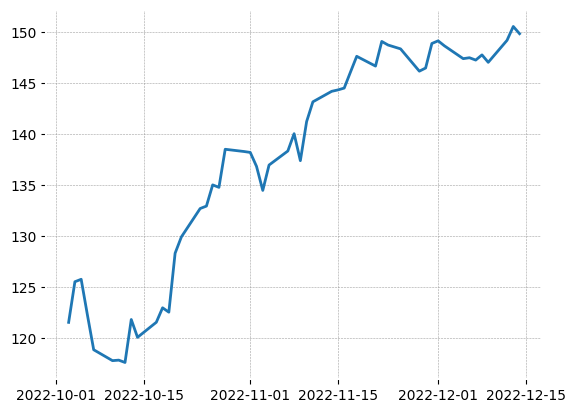

In [26]:
plt.plot(df['Close'])

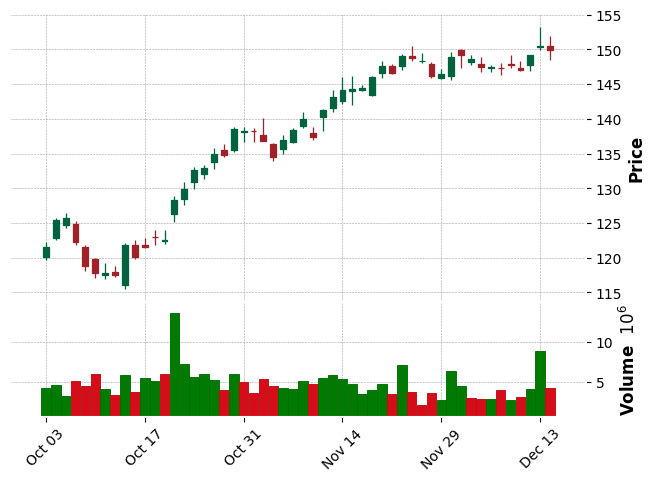

In [27]:
mpf.plot(df, type='candle', volume=True, style='charles')

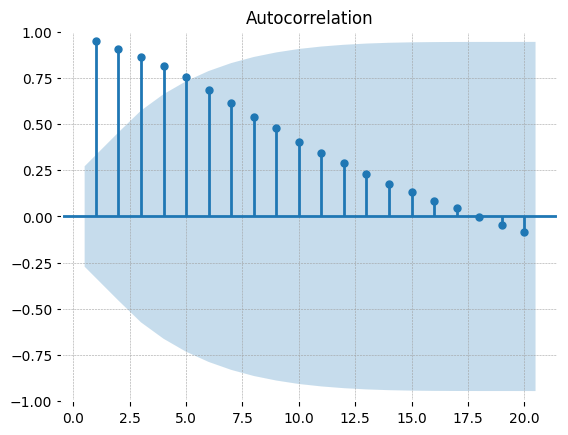

In [28]:
fig = plot_acf(df['Close'], lags=20, zero=False)

In [29]:
acorr_ljungbox(df['Close'], lags=20, return_df=True)

,lb_stat,lb_pvalue
1,49.647329,1.840204e-12
2,95.709808,1.647705e-21
3,138.188973,9.288206e-30
4,176.923862,3.412791e-37
5,210.847023,1.355455e-43
6,239.542178,7.030766e-49
7,263.157367,4.372787e-53
8,281.815526,3.037164e-56
9,296.638981,1.347451e-58
10,307.566167,3.905240e-60


p-values are all smaller than 0.05 so we reject the null hypothesis that the data is independently distributed

In [30]:
adfuller(df['Close'])

(-0.9398265150729506,
 0.7745742973095588,
 0,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 155.18453180208093)

adfuller test p-value is bigger than 0.05 so the data is not stationary

In [31]:
df['Diff Close'] = df['Close'].diff()

<Axes: xlabel='Date'>

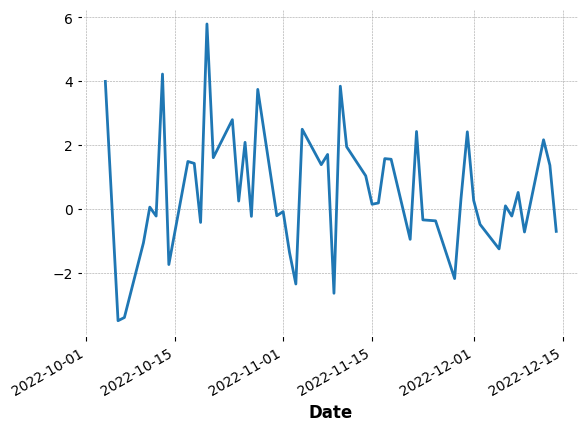

In [32]:
df['Diff Close'].plot()

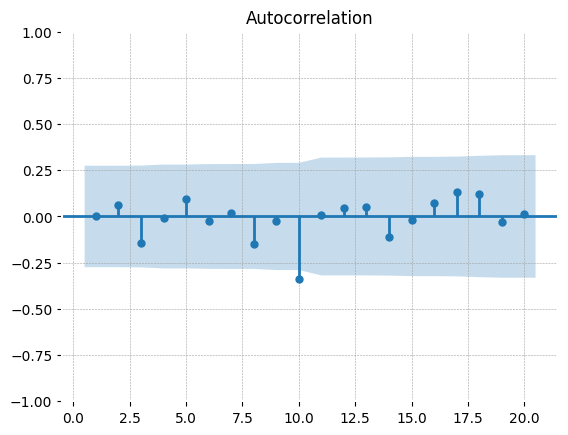

In [33]:
fig = plot_acf(df['Diff Close'].dropna(), lags=20, zero=False)

In [34]:
acorr_ljungbox(df['Diff Close'].dropna(), lags=20, return_df=True)

,lb_stat,lb_pvalue
1,0.000186,0.989111
2,0.210220,0.900226
3,1.363646,0.714078
4,1.367764,0.849778
5,1.922366,0.859780
6,1.964599,0.922925
7,1.982913,0.960780
8,3.421346,0.905207
9,3.460383,0.943222
10,11.117494,0.348438


Ljunbox test p-value for differentiated data is bigger than 0.05 so changes in the data are random

In [35]:
adfuller(df['Diff Close'].dropna())

(-3.4975414025237135,
 0.008050461013716129,
 9,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 153.7775047611643)

adfuller test p-value for differentiated data is smaller than 0.05 so the changes in data are stationary